In [4]:
import os
import sys
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker
sys.path.append(os.path.abspath(os.path.join('..')))
from src.Utils import save_plot

Loading the latest data: rfm_report_2026-01-28.parquet
Loading Done!


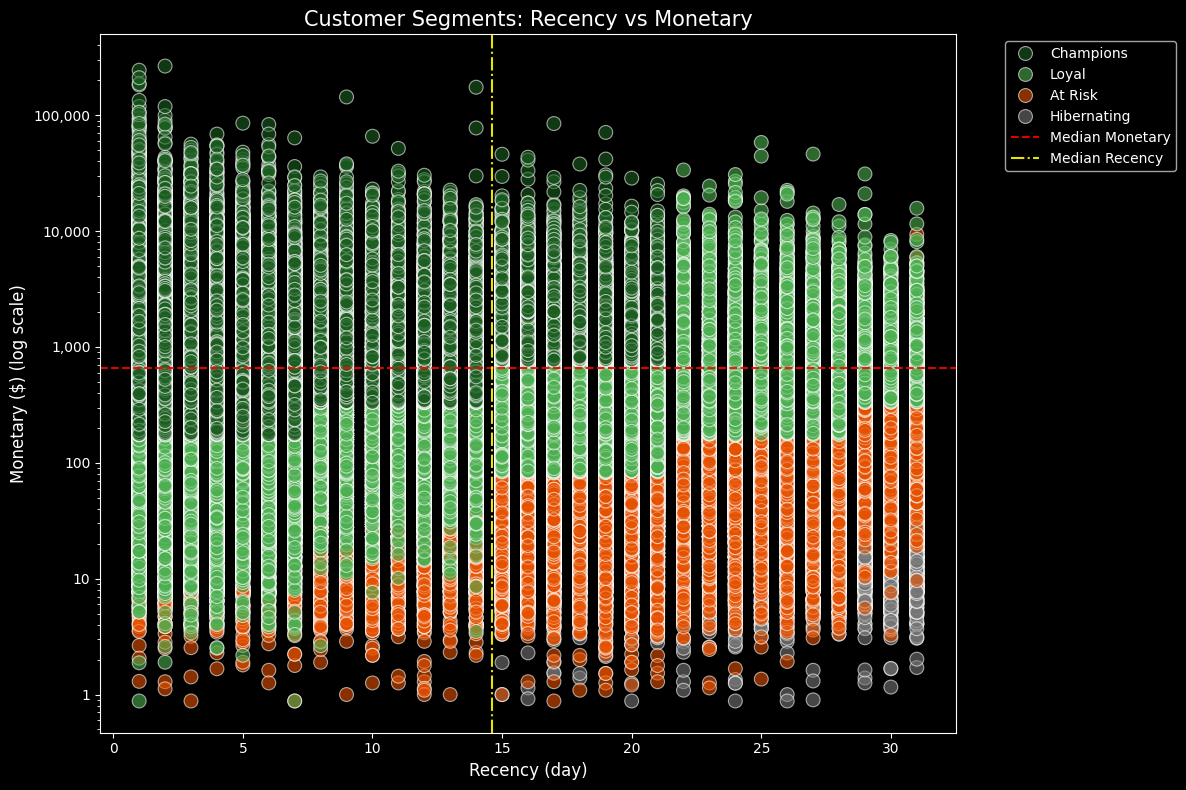

In [5]:


folder_path='../data/Gold-Data/'

# find all files with name 'rfm_report' in path and select newer
list_files= glob.glob(folder_path + f'rfm_report_*.parquet')
# list_files_2= glob.glob(os.path.join(folder_path,'rfm_report*.parquet'))

if not list_files:
    raise FileNotFoundError('No parquet file was found!')

# get latest rfm_report file in gold directory
latest_file= max(list_files)
#latest_file_2= max(list_files,key=os.path.getctime)

print(f'Loading the latest data: {os.path.basename(latest_file)}')
df_rfm=pd.read_parquet(latest_file)
print('Loading Done!')

segments_order=['Champions', 'Loyal','At Risk','Hibernating']
df_rfm['Segment']=pd.Categorical(df_rfm['Segment'],segments_order,ordered=True)

segments_colors={'Champions':'#1B5E20',
               'Loyal':'#4CAF50',
               'At Risk': '#E65100',
               'Hibernating':'#757575'
               }

plt.figure(figsize=(12, 8))
ax=sns.scatterplot(
    data=df_rfm.sort_values('Segment', ascending=False) , 
    x='Recency', 
    y='Monetary', 
    hue='Segment', 
    palette=segments_colors,   
    alpha=0.6,         # Increased slightly to make colors more "solid"
    edgecolor='w',     # Added a white edge to dots to help separate them
    s=100              # Increased point size for better visibility
)

plt.axhline(df_rfm['Monetary'].mean(), color='red', linestyle='--', alpha=0.9 , label='Median Monetary' )
plt.axvline(df_rfm['Recency'].mean(),color='Yellow', linestyle='dashdot',alpha=0.9, label='Median Recency')

plt.yscale('log') 

plt.title('Customer Segments: Recency vs Monetary', fontsize=15)
plt.xlabel('Recency (day)', fontsize=12)
plt.ylabel('Monetary ($) (log scale)', fontsize=12)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'{int(x):,}'))

save_plot('rfm_scatter_analysis.png', show=True)


C:\Users\Behrouz\AppData\Local\Temp\ipykernel_22920\2927791657.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_bar = df_rfm.groupby('Segment', as_index=False)['Monetary'].sum()


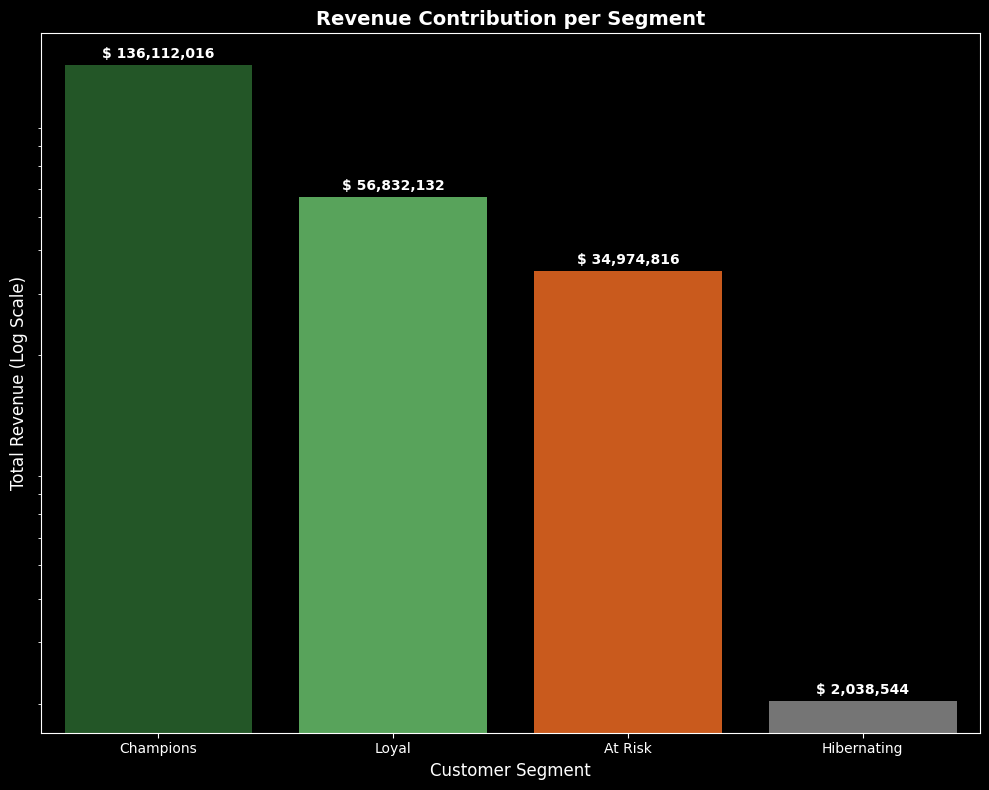

In [51]:

bar_color={'Champions':'#1B5E20',
               'Loyal':'#4CAF50',
               'At Risk': '#E65100',
               'Hibernating':'#757575'
               }

df_bar = df_rfm.groupby('Segment', as_index=False)['Monetary'].sum()

plt.figure(figsize=[10,8])

bar= sns.barplot(
    data=df_bar,
    x='Segment',
    y='Monetary',
    hue='Segment',
    palette=bar_color,
    legend=False
    )

plt.yscale('log')
bar.set_yticks([])
bar.set_yticklabels([])
for container in bar.containers:
    bar.bar_label(container, labels=[f'$ {int(x):,}' for x in container.datavalues],padding=3, fontsize=10, fontweight='bold')
plt.ylabel('Total Revenue (Log Scale)',fontsize=12)
plt.xlabel('Customer Segment',fontsize=12)
plt.title('Revenue Contribution per Segment', fontsize=14, fontweight='bold')

save_plot('revenue_per_segment_bar.png')

### 💰 Financial Impact per Segment
This analysis visualizes the total monetary value contributed by each customer group, using a logarithmic scale to account for the significant variance in spending power.

* **Revenue Powerhouse**: The **Champions** segment alone contributes over **$136 Million**, proving to be the most critical asset for business stability.
* **The "Golden" Core**: Combined, **Champions** and **Loyal** customers generate the vast majority of total revenue (approx. $193M), validating a high-value retention strategy.
* **At Risk Opportunities**: With nearly **$35 Million** tied up in the **At Risk** segment, there is a massive opportunity for recovery campaigns to prevent this value from migrating to the **Hibernating** category.
* **Data Visualization Note**:
    * The **Scatter Plot** uses median thresholds (Red/Yellow lines) to define the boundaries of active vs. inactive high-spenders.
    * The **Bar Chart** labels provide exact figures, highlighting the "long tail" of the customer base where Hibernating users contribute less than 1.5% of the Champions' total.

In [52]:

segment_counts = df_rfm['Segment'].value_counts()
print("Customer Count per Segment:")
print(segment_counts)

Customer Count per Segment:
Segment
At Risk        154736
Loyal          100265
Champions       63479
Hibernating     28638
Name: count, dtype: int64
